<a href="https://colab.research.google.com/github/Vidalic740/Accident-Severity/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import sklearn.linear_model as lm
import LinearRegression
from numpy.lib.arraysetops import unique

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import joblib
import pickle

mydata = pd.read_csv('/content/drive/MyDrive/Data/severity.csv')
mydata.head()

,Number_of_Casualties,Weather_Conditions
0,1,2
1,1,1
2,1,1
3,1,1
4,1,1


In [ ]:
dublicates_cas = mydata[mydata['Number_of_Casualties'].duplicated()]
duplicates_cap = mydata[mydata['Weather_Conditions'].duplicated()]
print(dublicates_cas)
print(duplicates_cap)

         Number_of_Casualties  Weather_Conditions
1                           1                   1
2                           1                   1
3                           1                   1
4                           1                   1
5                           1                   2
...                       ...                 ...
1048570                     2                   1
1048571                     1                   1
1048572                     1                   1
1048573                     1                   1
1048574                     1                   3

[1048534 rows x 2 columns]
         Number_of_Casualties  Weather_Conditions
2                           1                   1
3                           1                   1
4                           1                   1
5                           1                   2
6                           1                   1
...                       ...                 ...
1048570               

In [ ]:
unique_values = mydata.value_counts()
print(unique)

In [ ]:
null = mydata.isnull().sum()
print(null)

In [ ]:
mydata['Engine_Capacity'].replace(-1,400)

In [ ]:
summary = mydata.describe()
print(mydata.info())
print(summary)

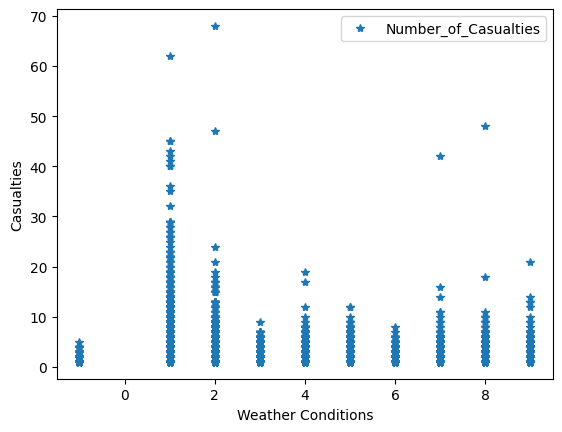

In [ ]:
variables = mydata.loc[:,['Weather_Conditions','Number_of_Casualties']]
mydata.plot(x='Weather_Conditions', y='Number_of_Casualties', style='*')
plt.xlabel('Weather Conditions')
plt.ylabel('Casualties')
plt.show()

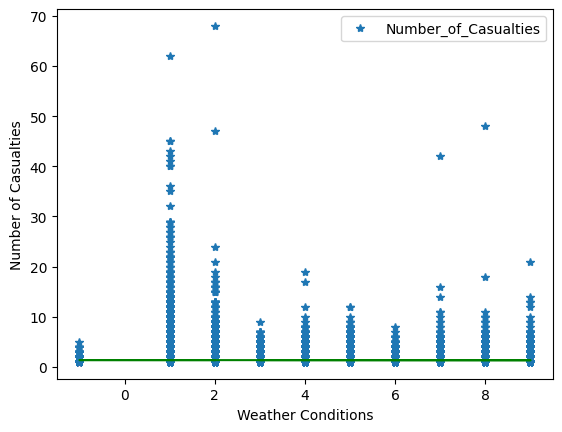

In [ ]:
regressor = lm.LinearRegression()
x = mydata[['Weather_Conditions']]
y = mydata[['Number_of_Casualties']]
regressor.fit(x,y)
mydata.plot(x = 'Weather_Conditions', y='Number_of_Casualties', style='*')
plt.plot(x, regressor.predict(x), color= 'green', label = 'Regression line')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Casualties')
plt.show()

In [ ]:
x = pd.DataFrame(mydata['Weather_Conditions'])
x = pd.DataFrame(mydata['Number_of_Casualties'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
regressor = lm.LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_test

,Number_of_Casualties
1045953,1
358409,1
875012,1
555046,1
272972,1
...,...
181305,1
672605,1
718823,1
1006146,2


In [77]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)

MAE 5.171246953791314e-16
MSE 4.243811368371754e-31
RMSE 6.514454212266561e-16


In [76]:
model = lm.LinearRegression()
model.fit(x,y)
joblib.dump(model, 'work.pkl')
with open('work.pkl', 'wb') as file:
  pickle.dump(model, file)

In [81]:
new_x = np.array([10, 20, 30]).reshape(-1, 1)
model = joblib.load('work.pkl')
predictions = model.predict(new_x)
new_data = pd.DataFrame({'x': new_x.flatten(), 'Predicted_y': predictions.flatten()})
print(new_data)

    x  Predicted_y
0  10         10.0
1  20         20.0
2  30         30.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
